The ECB collects statistical information from MFIs – the "money-issuing sector". MFIs, as defined by the ECB in [Regulation ECB/2021/2](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A32021R0379), comprise the following statistical sectors

- **central banks (S121)**, i.e. the national central banks of the EU Member States and the European Central Bank;
- **deposit-taking corporations except central banks (S122)**, which are:
  1. **credit institutions** , as defined in Article 4(1)(1) of [Regulation (EU) No 575/2013](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=celex%3A32013R0575), the business of which is to take deposits or other repayable funds from the public and to grant credits for their own account;
  2. **financial intermediaries other than credit institutions**  whose business is to receive deposits and/or close substitutes for deposits from institutional units (including from non-MFIs) and to grant loans and/or make investments in securities on their own account;
  3. **electronic money institutions** , as defined in Article 2(1) of [Directive 2009/110/EC](https://eur-lex.europa.eu/legal-content/en/TXT/?uri=CELEX%3A32009L0110), that are principally engaged in financial intermediation in the form of issuing electronic money;
- **money market funds (S123)**, i.e. collective investment undertakings that have been authorised pursuant to Article 4 of [Regulation (EU) 2017/1131](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A02017R1131-20190101) and that issue shares or units which are close substitutes for deposits.

In this notebook you can get an overview of the EU MFIs and their distribution as of January 2023

Create a folder to be used to store the output of the script and submit its path in the following cell, in place of 'C:/Users/xx/Desktop/Daily checks/ 

In [31]:
import datetime
today=datetime.date.today()

if today.weekday()>0 and today.weekday()<6:
    yesterday=today-datetime.timedelta(days=1)
elif today.weekday()==0:
    yesterday=today-datetime.timedelta(days=3)
else:
    yesterday=today-datetime.timedelta(days=2)

    
DayYesterday=datetime.datetime.strftime(yesterday,'%d')
MonthYesterday=datetime.datetime.strftime(yesterday,'%m')
YearYesterday=datetime.datetime.strftime(yesterday,'%Y')
t_1 = YearYesterday + '-' + MonthYesterday + '-' + DayYesterday

Daytoday=datetime.datetime.strftime(today,'%d')
Monthtoday=datetime.datetime.strftime(today,'%m')
Yeartoday=datetime.datetime.strftime(today,'%Y')
t = Yeartoday + '-' + Monthtoday + '-' + Daytoday

Import needed packages

In [2]:
import datetime
import json
import requests
import numpy as na
import getpass
import os
import pandas as pd
from lxml import etree
from logging import captureWarnings as disable_warnings
disable_warnings(True)
def set_default(obj):
    if isinstance(obj, set):
        return list(obj)
    raise TypeError
import io
from zipfile import ZipFile
import numpy as np
countries = ['AT','BE','BG','CY','CZ','DE','DK','EE','ES','E$','FI','FR',
             'GR','HR','HU','IE','IT','LT','LU','LV','MT','NL','PL','PT','RO','SE','SI','SK']

Submit your IAM credentials

In [4]:
with open(r'D:\path_here\creds.json') as f:
    
    creds =json.load(f)
username=creds["username"]
password=creds["password"]

In [25]:
t = '230120'

Download the list of EU MFIs from the ECB website

In [26]:
urlMFI= "https://www.ecb.europa.eu/stats/money/mfi/general/html/dla/mfi_MID/mfi_csv_" + t +".csv"
urlUpdate= "https://www.ecb.europa.eu/stats/money/mfi/general/html/dla/mfi_MID/mfi_csv_update_" + t + ".csv"
DailyChecksFolder = 'C:/Users/user/Desktop/Daily checks/MFIs/' + YearYesterday + '-' + MonthYesterday + '-' + DayYesterday

#Necessary proxy to interact with the website. Ad-hoc requested to DG-IS
proxi = {"http": "http://proxy_here:port_number",
         "https": "http://proxy_here:port_number"}
     
MFI=requests.get(urlMFI,allow_redirects=True,proxies=proxi,verify=False)
if MFI.status_code == 200:
    if not os.path.exists(DailyChecksFolder):
        os.makedirs(DailyChecksFolder)
    with open(DailyChecksFolder + '/mfi_csv_' + t + '.csv', 'bw') as f:  
        f.write(MFI.content)

Update=requests.get(urlUpdate,allow_redirects=True,proxies=proxi,verify=False)
if Update.status_code == 200:
    if not os.path.exists(DailyChecksFolder):
        os.makedirs(DailyChecksFolder)
    with open(DailyChecksFolder + '/mfi_csv_update_' + t + '.csv', 'bw') as f:  
        f.write(Update.content)

website=pd.read_csv(DailyChecksFolder + '/mfi_csv_' + t + '.csv', sep='\t', encoding= 'UTF-16LE')
update=pd.read_csv(DailyChecksFolder + '/mfi_csv_update_' + t + '.csv', sep='\t', encoding= 'UTF-16LE')
website

,RIAD_CODE,LEI,COUNTRY_OF_REGISTRATION,NAME,BOX,ADDRESS,POSTAL,CITY,CATEGORY,HEAD_COUNTRY_OF_REGISTRATION,HEAD_NAME,HEAD_RIAD_CODE,HEAD_LEI,REPORT
0,AT0000003888151,5299001Z8JOKGWV5O949,AT,Oesterreichische Nationalbank,61,"Otto-Wagner-Platz, 3",1090,Wien,Central Bank,NaN,NaN,NaN,NaN,Euro Area BSI Statistics full (non-tail) reporter
1,AT0000000674745,5299000OVRLMF858L016,AT,Oesterreichische Kontrollbank Aktiengesellschaft,70,"Am Hof, 4",1010,Wien,Credit Institution,NaN,NaN,NaN,NaN,Euro Area BSI Statistics full (non-tail) reporter
2,AT0000084375995,529900E6JZYYJ2O1OA64,AT,Oesterreichische Entwicklungsbank AG,NaN,"Strauchgasse, 1-3",1010,Wien,Credit Institution,NaN,NaN,NaN,NaN,Euro Area BSI Statistics full (non-tail) reporter
3,AT0000034042182,D1HEB8VEU6D9M8ZUXG17,AT,UniCredit Bank Austria AG,35,"Rothschildplatz, 1",1020,Wien,Credit Institution,NaN,NaN,NaN,NaN,Euro Area BSI Statistics full (non-tail) reporter
4,AT0000000537678,529900ICA8XQYGIKR372,AT,BAWAG P.S.K. Bank für Arbeit und Wirtschaft un...,171,"Wiedner Gürtel, 11",1100,Wien,Credit Institution,NaN,NaN,NaN,NaN,Euro Area BSI Statistics full (non-tail) reporter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5738,FR92364,NaN,FR,Banque Laydernier - fusion,NaN,NaN,NaN,NaN,Credit Institution,NaN,NaN,NaN,NaN,NaN
5739,FR92366,NaN,FR,Banque Tarneaud - fusion,NaN,NaN,NaN,NaN,Credit Institution,NaN,NaN,NaN,NaN,NaN
5740,FR92370,NaN,FR,SOCIETE DE BANQUE MONACO - fusion,NaN,NaN,NaN,NaN,Credit Institution,NaN,NaN,NaN,NaN,NaN
5741,FR92367,NaN,FR,Banque Nuger - fusion,NaN,NaN,NaN,NaN,Credit Institution,NaN,NaN,NaN,NaN,NaN


In [28]:
update

,RIAD_CODE,LEI,COUNTRY_OF_REGISTRATION,NAME,BOX,ADDRESS,POSTAL,CITY,CATEGORY,HEAD_COUNTRY_OF_REGISTRATION,HEAD_NAME,HEAD_RIAD_CODE,HEAD_LEI,REPORT,CHANGE
0,AT0000209974185,NaN,AT,"VTB Bank (Europe) SE, Zweigniederlassung Wien",560.0,"Wipplingerstraße, 35/Top 11",1010,Wien,Credit Institution,DE,VTB Bank (Europe) SE,DE03487,529900N90QS8ARRHWY83,NaN,U
1,FR21733,NaN,FR,Adyen N.V.,NaN,6 BOULEVARD HAUSSMANN,75009,PARIS,Credit Institution,NL,Adyen N.V.,NLF0001,724500973ODKK3IFQ447,Euro Area BSI Statistics tail reporter,U
2,FR20433,5299002VV0CUVFB0WK78,FR,N26 Bank AG,NaN,17 RUE SAINT FIACRE,75002,PARIS,Credit Institution,DE,N26 Bank AG,DE05889,529900JB9XYZ8E87N345,Euro Area BSI Statistics tail reporter,U
3,FR24733,5493008F7ZBOK2XIM162,FR,Bank of Montreal Europe plc,NaN,7 PLACE VENDOME,75001,PARIS,Credit Institution,IE,Bank of Montreal Europe PLC,IEBMIXXX,5493000YPN33HF74SN02,Euro Area BSI Statistics tail reporter,U
4,FR24833,5493009WEUP8D9PW0J51,FR,State Street Bank International GmbH,NaN,"100, Esplanade du Général de Gaulle",92400,COURBEVOIE,Credit Institution,DE,State Street Bank International GmbH,DE05626,ZMHGNT7ZPKZ3UFZ8EO46,Euro Area BSI Statistics tail reporter,U
5,FR25933,549300HV9IHW0B6UUA13,FR,DekaBank deutsche girozentrale,NaN,34 RUE TRONCHET,75009,PARIS,Credit Institution,DE,DekaBank Deutsche Girozentrale,DE00313,0W2PZJM8XOY22M4GG883,Euro Area BSI Statistics tail reporter,U


In [29]:
na_rc = website[website['RIAD_CODE'] == 'NA']
if na_rc.empty == True:
    print('All MFIs have valid RIAD codes.')
else:
    print(na_rc)

na_rc2 = update[update['RIAD_CODE'] == 'NA']
if na_rc2.empty == True:
    print('All MFIs have valid RIAD codes.')
else:
    print(na_rc2)

All MFIs have valid RIAD codes.
All MFIs have valid RIAD codes.


Download list of EU MFIs via WebServices

In [4]:
resMFIs = requests.get("https:///wsrest_url_here",auth=(username,password), verify=False)
if resMFIs.status_code == 200:
    root = etree.fromstring(resMFIs.content)
    ns = root.nsmap
    ns['d1'] = "http://www.ecb.int/schema_here"
    dicR = {'keys_here'}
    variablesR = ['variables_here']
    if len(root.findall('./d1:results/d1:orgUnit', ns))==0:
        results = root.findall('./ns2:results/ns2:orgUnit', ns)
        for orgUnit in results :
            for variable in variablesR :
                if orgUnit.find('ns2:' + variable, ns) is not None :
                    dicR[variable].append(orgUnit.find('ns2:' + variable, ns).text)
                else :
                    dicR[variable].append('NA')
    else:
        results = root.findall('./d1:results/d1:orgUnit', ns)
        for orgUnit in results :
            for variable in variablesR :
                if orgUnit.find('d1:' + variable, ns) is not None :
                    dicR[variable].append(orgUnit.find('d1:' + variable, ns).text)
                else :
                    dicR[variable].append('NA')

    dfT=pd.DataFrame(dicR).dropna()
    # Select only EU MFIs
    dfT = dfT[dfT['cntry'].isin(countries)]


print(resMFIs)
print("Today there are {} EU MFIs in RIAD".format(len(dfT)))

adf = dfT[dfT['nm_entty'] == np.nan]
if adf.empty == True: 
    print('All MFI have names.')
else:
    print(adf)
    
dfT.head()

<Response [200]>
Today there are 5743 EU MFIs in RIAD AS
All MFI have names.


,entty_riad_cd,dt_brth,dt_cls,instttnl_sctr,nm_entty,instttnl_sctr_dtl,cntry
0,FR12933,2018-07-01,9999-12-31,S122,Caixabank,S122_A,FR
1,PT33,1985-06-25,9999-12-31,S122,"BANCO COMERCIAL PORTUGUÊS, SA",S122_A,PT
2,FR19229,1987-04-10,9999-12-31,S122,Banco de Sabadell,S122_A,FR
3,FR11728,2018-09-06,9999-12-31,S122,MMB SCF,S122_A,FR
4,FR25833,2019-11-15,9999-12-31,S122,Macquarie Bank Europe Designated Activity Company,S122_A,FR


In [5]:
resMFIs = requests.get("/wsrest_here",auth=(username,password), verify=False)
if resMFIs.status_code == 200:
    root = etree.fromstring(resMFIs.content)
    ns = root.nsmap
    ns['d1'] = "http://www.ecb_schema_here"
    dicR = {'keys_here'}
    variablesR = ['variables_here']
    if len(root.findall('./d1:results/d1:orgUnit', ns))==0:
        results = root.findall('./ns2:results/ns2:orgUnit', ns)
        for orgUnit in results :
            for variable in variablesR :
                if orgUnit.find('ns2:' + variable, ns) is not None :
                    dicR[variable].append(orgUnit.find('ns2:' + variable, ns).text)
                else :
                    dicR[variable].append('NA')
    else:
        results = root.findall('./d1:results/d1:orgUnit', ns)
        for orgUnit in results :
            for variable in variablesR :
                if orgUnit.find('d1:' + variable, ns) is not None :
                    dicR[variable].append(orgUnit.find('d1:' + variable, ns).text)
                else :
                    dicR[variable].append('NA')

    dfY=pd.DataFrame(dicR).dropna()
    # Select only EU MFIs
    dfY = dfY[dfY['cntry'].isin(countries)]


print(resMFIs)
print("Yesterday there were {} EU MFIs in RIAD".format(len(dfY)))


adf = dfY[dfY['nm_entty'] == np.nan]
if adf.empty == True: 
    print('All MFI have names.')
else:
    print(adf)
    
dfY.head()

<Response [200]>
Yesterday there were 5743 EU MFIs in RIAD AS
All MFI have names.


,entty_riad_cd,dt_brth,dt_cls,instttnl_sctr,nm_entty,instttnl_sctr_dtl,cntry
257,AT0000000309375,1998-01-01,9999-12-31,S122,Raiffeisenlandesbank Oberösterreich Aktiengese...,S122_A,AT
258,AT0000000537595,1998-01-01,9999-12-31,S122,Banco do Brasil Aktiengesellschaft,S122_A,AT
259,AT0000000537678,2000-12-31,9999-12-31,S122,BAWAG P.S.K. Bank für Arbeit und Wirtschaft un...,S122_A,AT
260,AT0000000548014,1998-01-01,9999-12-31,S122,Oberbank AG,S122_A,AT
261,AT0000000550424,1998-01-01,9999-12-31,S122,Schoellerbank Aktiengesellschaft,S122_A,AT


In [49]:
dfY['cntry'].value_counts().nlargest(10)

DE    1396
FR     625
PL     579
IT     453
AT     447
IE     410
LU     258
ES     242
FI     192
SE     163
Name: cntry, dtype: int64

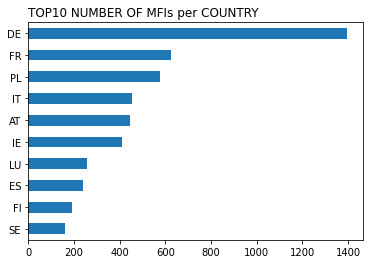

In [67]:
import matplotlib.pyplot as plt

dfY['cntry'].value_counts().nlargest(10).plot(kind='barh').invert_yaxis()
plt.title('TOP10 NUMBER OF MFIs per COUNTRY', loc = 'left')
plt.show()

_____________________________________________________________________________________________________________ 

## RESULTS OF THE MFI CHECK ##

#### LOST MFIs ####

In [6]:
today_MFI = set(dfT.entty_riad_cd)
lost_MFI = [i for i in dfY.index if dfY.entty_riad_cd[i] not in today_MFI]
print("These are the lost MFIs")
dfY.loc[lost_MFI, dfY.columns.values]

These are the lost MFIs


,entty_riad_cd,dt_brth,dt_cls,instttnl_sctr,nm_entty,instttnl_sctr_dtl,cntry


#### NEW MFIs #####

In [7]:
print("These are the new MFIs")
yesterday_MFI = set(dfY.entty_riad_cd)
new_MFI = [i for i in dfT.index if dfT.entty_riad_cd[i] not in yesterday_MFI]
dfT.loc[new_MFI, dfT.columns.values]

These are the new MFIs


,entty_riad_cd,dt_brth,dt_cls,instttnl_sctr,nm_entty,instttnl_sctr_dtl,cntry
